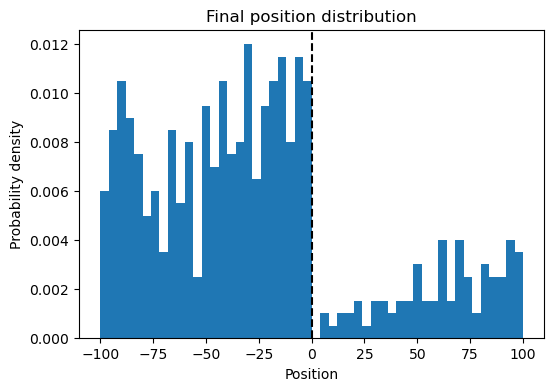

Left room: 406
Right room: 94


In [5]:
import random
import matplotlib.pyplot as plt

##### Parameters #####

random.seed(4)

N = 500 # Number of particles
L = 100 # Lattice dimension
T = 5000 # Discrete time steps

xmin, xmax = -L, L


##### Initial condition #####

positions = [random.randint(xmin, xmax) for _ in range(N)]


##### Time evolution #####

for t in range(T):
    new_positions = []

    for x in positions:
        hop = random.choice([-1, 1])
        x_trial = x + hop

        # reflecting boundary conditions
        if x_trial < xmin:
            x_trial = xmin
        elif x_trial > xmax:
            x_trial = xmax

        # asymmetric doorway at 0
        # left -> right forbidden
        if x < 0 and x_trial >= 0:
            x_trial = x   # reflect

        new_positions.append(x_trial)

    positions = new_positions


##### Analysis #####

plt.figure(figsize=(6,4))
plt.hist(positions, bins=50, density=True)
plt.axvline(0, color='k', linestyle='--')
plt.xlabel("Position")
plt.ylabel("Probability density")
plt.title("Final position distribution")
plt.show()

print("Left room:", sum(1 for x in positions if x < 0))
print("Right room:", sum(1 for x in positions if x > 0))